## Discharges for NAYS runs

We want to create a discharge hydrograph for a time, t, for random, periodic (time wise), discharges that have an overall SD < 0.5 (per Schuurman dissertation Ch. 3) to add subtle white noise to the NAYS runs to see if that causes the bed to deform more regularly. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
#from google.colab import drive
#drive.mount("/content/gdrive")

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

24


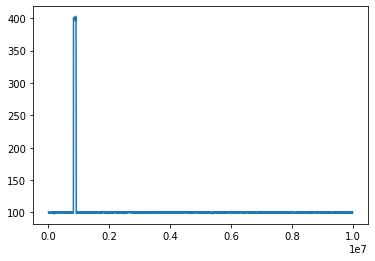

In [17]:
## all units in seconds
t0 = 0
tfin = 1e7

tpeturb = 3600 #how often to change the discharge, sampling unit of time series

#define your flood, these arrays must be the same length
flooddelay = 3600 #when do you want to start the flood
floodlength = 86400 ##how long is ur flood

thot = 820800 # timestep from which you are starting
floodstart = thot + flooddelay
floodend = floodstart+floodlength
state = 2 #1 for steady state, 2 for flooding



discharge_data = np.empty([int((tfin-t0)//tpeturb)+1, 2])
#print(tfin//tpeturb)
discharge_data[:, 0] = np.arange(t0, tfin, tpeturb) #time series of the discharge data

## DEFINE THE DISCHARGES

qavg = 100 #mean discharge
sdavg = 0.5 #standard deviation of the white noise discharge
size = len(discharge_data)

qflood = 400 #array of flood discharges
sdflood = 2 #array of standard devations you want

discharge_data[:, 1] = np.random.normal(qavg, sdavg, len(discharge_data))
##create a flood
print(floodlength//tpeturb)
if state == 2:
  flood = np.empty([int(floodlength//tpeturb), 2])
  flood[:, 0] = np.arange(floodstart, floodend, tpeturb )
  flood[:, 1] = np.random.normal(qflood, sdflood, len(flood))
  #print(flood)

#(print(discharge_data))
  for i, idx in zip(flood[:, 0], np.arange(0, len(flood))):
    replace = np.where(discharge_data==i)
    #print(int(replace[0]))
    #print(type(i))
    discharge_data[replace[0], 1] = flood[int(idx), 1]

plt.plot(discharge_data[:, 0], discharge_data[:, 1])

In [18]:
modelrun = f'{int(floodlength/3600)}hrFlood_qf{qflood}_2SD-afterhour1_q{qavg}'
saveto = f'/Users/safiya/Documents/NAYS2DH/Discharges/{modelrun}'
np.savetxt(saveto+".csv", discharge_data, delimiter=",")

In [14]:
disch = pd.read_csv('/Users/safiya/Documents/NAYS2DH/Discharges/24hrFlood_2SD-afterhour1_100.csv')


TypeError: '(0, slice(None, None, None))' is an invalid key